INTRODUCTION
This dataset contains daily stock market data for multiple companies across sectors in July 2025. Each record represents trading activity for a given stock (Ticker) on a specific date. The dataset includes price-related fields (Open Price, Close Price, High Price, Low Price), performance metrics (PE Ratio, Dividend Yield, EPS), market statistics (Volume Traded, Market Cap), and benchmarks (52 Week High, 52 Week Low).

The objective of analyzing this dataset is to:

Understand stock performance trends.

Compare valuation ratios (PE, Dividend Yield, EPS).

Explore sector-wise variations.

Identify potential investment insights such as undervalued stocks, trading volume spikes, or resistance/support levels.

Import nesassary libraries

In [2]:
#remove warning message
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime

import dataset

In [3]:
df=pd.read_csv("C:\datascience\PROJECT\stock_data_july_2025.csv")

Display 5 rows of the dataset

In [4]:
print(df.tail())

            Date Ticker  Open Price  Close Price  High Price  Low Price  \
4341  23-07-2025   VRTX      478.20       489.78      491.84     476.65   
4342  23-07-2025     VZ       46.61        47.75       48.26      46.15   
4343  23-07-2025    WMT       71.65        70.99       72.35      70.46   
4344  23-07-2025    XOM      117.02       112.37      118.45     111.41   
4345  23-07-2025    ZTS      146.81       148.32      150.25     145.16   

      Volume Traded    Market Cap  PE Ratio  Dividend Yield    EPS  \
4341        7141573  1.280000e+11     28.64            0.00  17.10   
4342        9865947  1.860000e+11      9.31            5.82   5.13   
4343       22059711  5.560000e+11     25.93            1.27   2.74   
4344       13557718  4.400000e+11     15.72            3.09   7.15   
4345        5102989  6.723840e+10     29.39            0.74   5.05   

      52 Week High  52 Week Low                  Sector  
4341        603.57       411.70              Healthcare  
4342        

Data cleaning 

In [5]:
#check whether there are any missing values
print(df.isna().sum())

Date              0
Ticker            0
Open Price        0
Close Price       0
High Price        0
Low Price         0
Volume Traded     0
Market Cap        0
PE Ratio          0
Dividend Yield    0
EPS               0
52 Week High      0
52 Week Low       0
Sector            0
dtype: int64


In [6]:
#remove spaces from column names
df.colums=df.columns.str.replace('','_')

In [7]:
#check duplicate rows
df.duplicated().sum()

0

In [8]:
#basic informaation about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4346 non-null   object 
 1   Ticker          4346 non-null   object 
 2   Open Price      4346 non-null   float64
 3   Close Price     4346 non-null   float64
 4   High Price      4346 non-null   float64
 5   Low Price       4346 non-null   float64
 6   Volume Traded   4346 non-null   int64  
 7   Market Cap      4346 non-null   float64
 8   PE Ratio        4346 non-null   float64
 9   Dividend Yield  4346 non-null   float64
 10  EPS             4346 non-null   float64
 11  52 Week High    4346 non-null   float64
 12  52 Week Low     4346 non-null   float64
 13  Sector          4346 non-null   object 
dtypes: float64(10), int64(1), object(3)
memory usage: 475.5+ KB
None


In [9]:
#use summary statistics to undertand distributions
print(df.describe())

        Open Price  Close Price   High Price    Low Price  Volume Traded  \
count  4346.000000  4346.000000  4346.000000  4346.000000   4.346000e+03   
mean    337.837002   337.907635   343.086233   332.737186   1.658002e+07   
std     472.650926   472.769476   479.915872   465.653353   1.522197e+07   
min      19.040000    18.990000    19.410000    18.900000   2.003906e+06   
25%     110.797500   110.527500   112.187500   109.292500   7.491280e+06   
50%     196.925000   195.915000   199.960000   193.745000   1.187239e+07   
75%     448.885000   451.100000   457.435000   443.027500   2.087384e+07   
max    3848.170000  3894.270000  3923.200000  3810.020000   8.996302e+07   

         Market Cap     PE Ratio  Dividend Yield          EPS  52 Week High  \
count  4.346000e+03  4346.000000     4346.000000  4346.000000   4346.000000   
mean   4.027168e+11    25.581173        1.807835    13.693049    410.097975   
std    6.202065e+11    12.923249        1.557671    20.268110    575.709969   

1.Most traded stocks by average Volume

In [10]:
print(df.groupby("Ticker")["Volume Traded"].mean().sort_values(ascending=False).head())

Ticker
GOOGL    6.329104e+07
META     6.125019e+07
AAPL     6.091015e+07
MSFT     5.671241e+07
AMZN     5.665857e+07
Name: Volume Traded, dtype: float64


2.Market Cap by sector

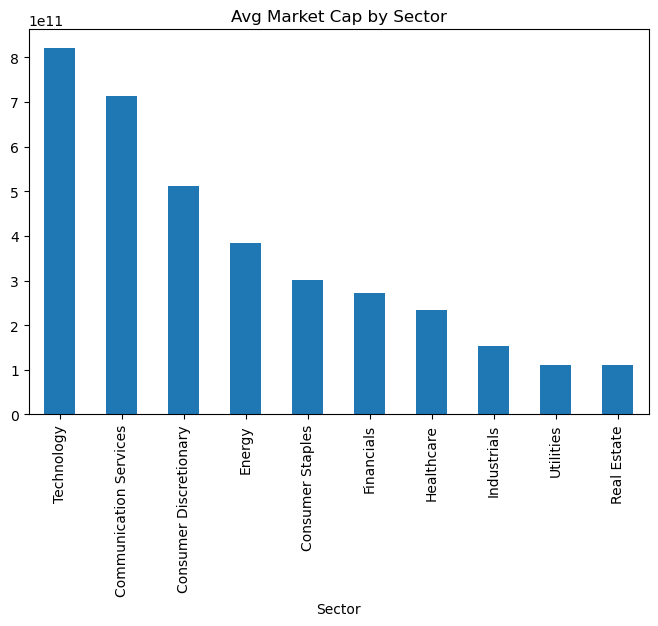

In [11]:
sector_cap = df.groupby("Sector")["Market Cap"].mean().sort_values(ascending=False)
sector_cap.plot(kind="bar", figsize=(8,5), title="Avg Market Cap by Sector")
plt.show()

Close price trends for selected tickers

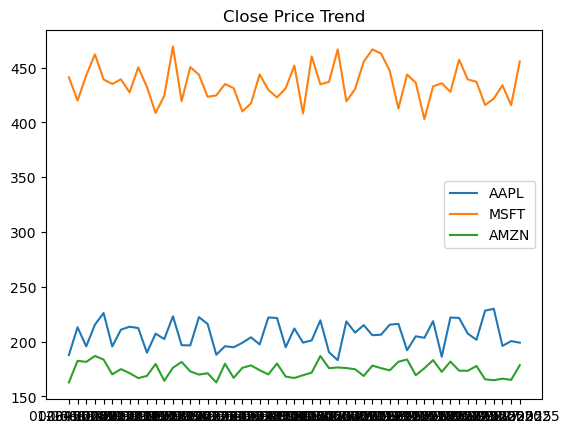

In [12]:
tickers = ["AAPL", "MSFT", "AMZN"]
for t in tickers:
    subset = df[df["Ticker"] == t]
    plt.plot(subset["Date"], subset["Close Price"], label=t)
plt.title("Close Price Trend")
plt.legend()
plt.show()

Stocks closest to 52-week high/low

In [13]:
df["Pct_to_High"] = (df["52 Week High"] - df["Close Price"]) / df["52 Week High"] * 100
df["Pct_to_Low"] = (df["Close Price"] - df["52 Week Low"]) / df["52 Week Low"] * 100
print("Stocks near 52W High:\n", df.sort_values("Pct_to_High").head())
print("Stocks near 52W Low:\n", df.sort_values("Pct_to_Low").head())

Stocks near 52W High:
             Date Ticker  Open Price  Close Price  High Price  Low Price  \
2771  04-07-2025   SPGI      454.20       462.17      467.87     451.40   
3111  08-07-2025   VRTX      484.33       474.24      489.37     471.92   
1810  23-06-2025   AMGN      297.24       296.71      298.41     292.73   
3719  16-07-2025    HON      211.53       206.89      214.14     206.35   
1459  18-06-2025   SPGI      455.71       467.02      470.09     453.64   

      Volume Traded    Market Cap  PE Ratio  Dividend Yield    EPS  \
2771       12345093  1.460000e+11     41.06            0.83  11.26   
3111        2967438  1.240000e+11     31.59            0.00  15.01   
1810        7899687  1.510000e+11     15.27            2.77  19.43   
3719        7833277  1.400000e+11     26.80            2.02   7.72   
1459       11921969  1.470000e+11     41.09            0.83  11.37   

      52 Week High  52 Week Low       Sector  Pct_to_High  Pct_to_Low  
2771        499.16       305.61  

PE Ratio by sector

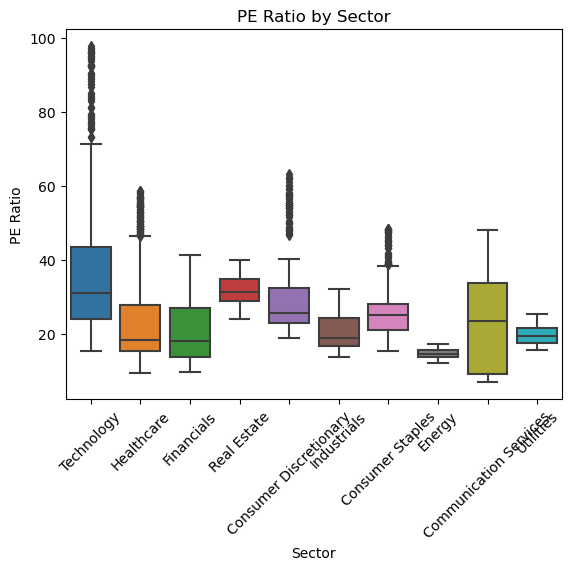

In [14]:
sns.boxplot(data=df,x="Sector",y="PE Ratio")
plt.xticks(rotation=45)
plt.title("PE Ratio by Sector")
plt.show()


Correlation heatmap            

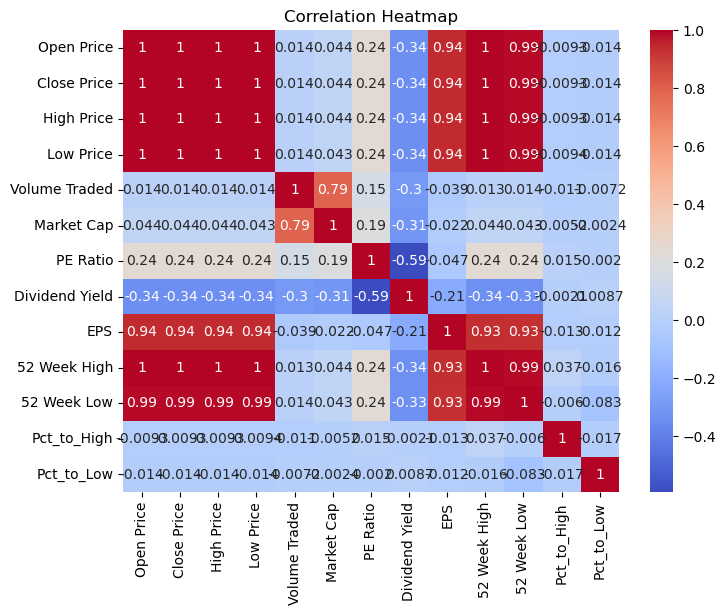

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

 Avg Dividend Yield by sector

In [16]:
div_yield = df.groupby("Sector")["Dividend Yield"].mean().sort_values(ascending=False)
print(div_yield)

Sector
Utilities                 3.373459
Energy                    3.093019
Real Estate               2.650566
Consumer Staples          2.371402
Communication Services    2.279654
Industrials               2.101698
Healthcare                2.036698
Financials                1.655371
Technology                0.925182
Consumer Discretionary    0.896631
Name: Dividend Yield, dtype: float64


Highest trading volume day

In [18]:
day_volume = df.groupby("Date")["Volume Traded"].sum()
print("Highest Volume Day:", day_volume.idxmax(), day_volume.max())

Highest Volume Day: 04-07-2025 1527090019


Volatility by sector (High - Low Price)

In [19]:
df["Daily Range"] = df["High Price"] - df["Low Price"]
print(df.groupby("Sector")["Daily Range"].mean().sort_values(ascending=False))


Sector
Consumer Discretionary    20.984906
Technology                14.334465
Healthcare                10.581918
Financials                 8.604415
Industrials                7.379650
Communication Services     7.269780
Consumer Staples           6.452264
Energy                     5.169057
Real Estate                4.893585
Utilities                  2.200818
Name: Daily Range, dtype: float64


Top movers by price change

In [20]:
df["Price Change"] = df["Close Price"] - df["Open Price"]
print(df.nlargest(10, "Price Change")[["Date","Ticker","Price Change"]])

            Date Ticker  Price Change
3291  11-07-2025   BKNG         90.43
3701  16-07-2025   BKNG         81.48
1815  23-06-2025   BKNG         77.38
2799  05-07-2025   BKNG         76.36
2225  28-06-2025   BKNG         69.15
1159  15-06-2025   BKNG         67.57
421   06-06-2025   BKNG         65.62
1323  17-06-2025   BKNG         63.88
585   08-06-2025   BKNG         62.64
1979  25-06-2025   BKNG         62.08


Feature Engineering


In [23]:
#Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")

#Daily Price Range (High - Low)
df['Daily_Range'] = df['High Price'] - df['Low Price']
#Price Change (Close - Open)
df['Price_Change'] = df['Close Price'] - df['Open Price']
#Percentage Change
df['Pct_Change'] = ((df['Close Price'] - df['Open Price']) / df['Open Price']) * 100
#Proximity to 52 Week High / Low
df['Pct_to_52W_High'] = (df['52 Week High'] - df['Close Price']) / df['52 Week High'] * 100
df['Pct_to_52W_Low'] = (df['Close Price'] - df['52 Week Low']) / df['52 Week Low'] * 100
#Volatility Score (daily range relative to close)
df['Volatility'] = (df['Daily_Range'] / df['Close Price']) * 100
#Log Transformation of Market Cap
df['Log_MarketCap'] = np.log1p(df['Market Cap'])
#Dividend Strength (EPS × Dividend Yield)
df['Dividend_Strength'] = df['Dividend Yield'] * df['EPS']
#Time-based Features
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.day_name()
df['Week'] = df['Date'].dt.isocalendar().week
print(df.head(10))





        Date Ticker  Open Price  Close Price  High Price  Low Price  \
0 2025-06-01   AAPL      185.96       187.79      188.85     183.74   
1 2025-06-01   ABBV      189.63       193.64      194.31     188.03   
2 2025-06-01    ABT      118.79       120.08      120.53     118.01   
3 2025-06-01   ADBE      584.51       567.78      587.97     561.25   
4 2025-06-01    ADP      253.46       255.60      258.59     249.91   
5 2025-06-01    AMD      165.43       168.78      170.72     164.07   
6 2025-06-01   AMGN      299.22       302.81      305.29     295.26   
7 2025-06-01    AMT      202.28       206.84      208.15     200.10   
8 2025-06-01   AMZN      166.23       162.71      168.49     161.02   
9 2025-06-01   AVGO     1698.77      1690.55     1720.26    1673.44   

   Volume Traded    Market Cap  PE Ratio  Dividend Yield  ...  Price_Change  \
0       42257183  2.930000e+12     28.37            0.49  ...          1.83   
1       33074970  3.290000e+11     16.74            3.51  ..

Suggestions & Recommendations for Stock Dataset
1. Focus on Volatility Management

Observation: Some stocks (especially in Technology) show high daily price ranges and volatility scores compared to defensive sectors like Healthcare.
Recommendation:

Investors with lower risk appetite should prefer low-volatility sectors (e.g., Consumer Staples, Healthcare).

Traders can exploit high-volatility stocks (e.g., Tech) for short-term opportunities with stop-loss strategies.

2. Identify Stocks Near 52-Week Lows

Observation: Certain tickers are trading close to their 52-week lows, indicating potential undervaluation.
Recommendation:

Consider these as value opportunities if fundamentals (EPS growth, dividend strength) are strong.

Apply additional filters (sector outlook, recent earnings) before investing.

3. Dividend Yield vs. Growth Balance

Observation: Financials and Utilities show higher dividend yields, while Tech and Healthcare lean toward growth-oriented EPS with lower dividends.
Recommendation:

Income-focused investors should prioritize dividend-heavy sectors.

Growth-focused investors can prefer reinvestment-heavy sectors like Technology.

4. Monitor PE and EPS Misalignments

Observation: Some stocks have high PE Ratios but weak EPS, leading to stretched valuations.
Recommendation:

Reassess exposure to overvalued companies.

Look for balanced PE–EPS ratios or improving EPS trends for safer long-term bets.

5. Sector-Wise Market Cap Concentration

Observation: Technology and Healthcare dominate the dataset by Market Cap, while smaller sectors show relatively less representation.
Recommendation:

Diversify across mid- and small-cap sectors to reduce concentration risk.

Monitor Tech-heavy portfolios, as macro shifts (like interest rates or regulation) can disproportionately affect them.

6. Trading Volume Insights

Observation: Stocks like AAPL and MSFT consistently record very high trading volumes, making them liquid and stable.
Recommendation:

Use high-volume stocks for short-term entry/exit strategies.

Avoid thinly traded stocks for intraday trading due to high spread risk.

7. Timing Strategy Based on Weekday Trends

Observation: Weekday analysis shows slight variations in daily returns and trading volumes.
Recommendation:

Apply day-of-week strategies (e.g., higher volumes on Mondays, steadier returns mid-week).

Algorithmic traders can optimize entry points by aligning with recurring weekday patterns.

8. Long-Term Investors: Look Beyond July 2025

Observation: July data is short-term; real investment insights require multi-month trend analysis.
Recommendation:

Extend dataset to quarterly or yearly views.

Focus on long-term moving averages (50-day, 200-day) instead of only July’s short-term fluctuations.